In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt

In [17]:
df = pd.read_excel('../data/base_final.xlsx').drop(columns='Unnamed: 0', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26898 entries, 0 to 26897
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   categoria    26898 non-null  object        
 1   href         26896 non-null  object        
 2   fecha        26898 non-null  datetime64[ns]
 3   title        26898 non-null  object        
 4   year         26898 non-null  int64         
 5   tokens       26898 non-null  object        
 6   lem_tokens   26898 non-null  object        
 7   taggedWords  26898 non-null  object        
 8   nouns        26898 non-null  object        
 9   verbs        26898 non-null  object        
 10  adjectives   26898 non-null  object        
 11  bigrams      26898 non-null  object        
 12  neg          26898 non-null  float64       
 13  neu          26898 non-null  float64       
 14  pos          26898 non-null  float64       
 15  compound     26898 non-null  float64       
 16  comp

In [20]:
df.categoria.unique()

array(['Mundo', 'Internacional', 'Economía', 'Política', 'Mercados',
       'Empresas'], dtype=object)

### Politica

In [37]:
politica = df[df['categoria'] == 'Política']
politica = politica.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
politica['SMA_5'] = politica['compound'].rolling(window = 5, min_periods = 1).mean()
politica['SMA_20'] = politica['compound'].rolling(window = 20, min_periods = 1).mean()


<AxesSubplot:xlabel='fecha', ylabel='compound'>

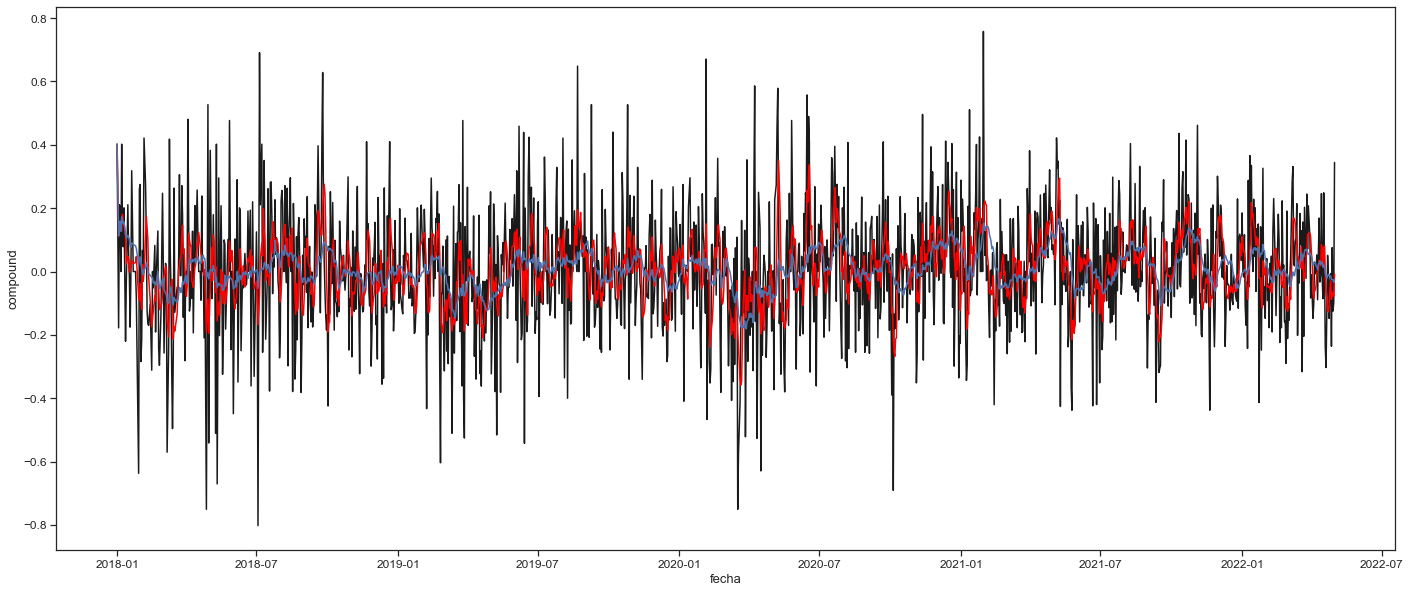

In [38]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=politica, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=politica, x = 'fecha', y = 'SMA_20', color= 'b')


---

### noticias exterior

In [36]:
exterior = df[(df['categoria'] == 'Mundo') | (df['categoria'] == 'Internacional')]
exterior = exterior.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
exterior['SMA_5'] = exterior['compound'].rolling(window = 5, min_periods = 1).mean()
exterior['SMA_20'] = exterior['compound'].rolling(window = 20, min_periods = 1).mean()



#### exterior y politica

- compound

<AxesSubplot:xlabel='fecha', ylabel='compound'>

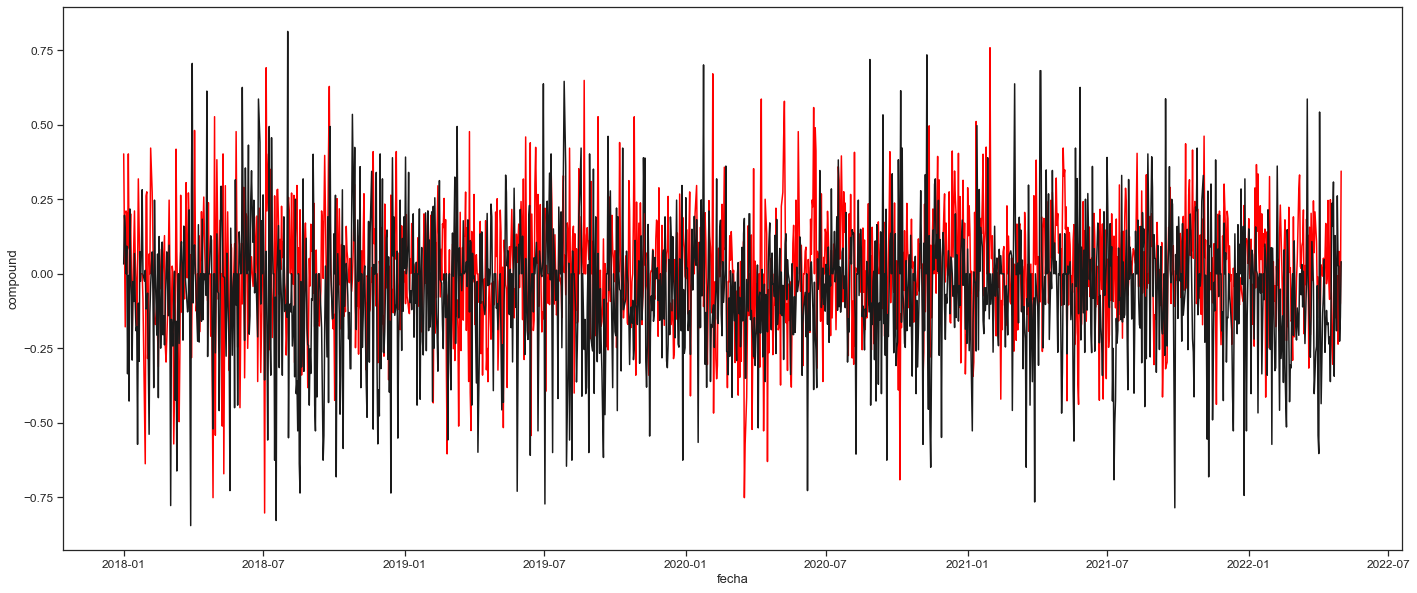

In [33]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=politica, x = 'fecha', y = 'compound', color= 'red')
sns.lineplot(data=exterior, x = 'fecha', y = 'compound', color= 'k')

- sma5

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

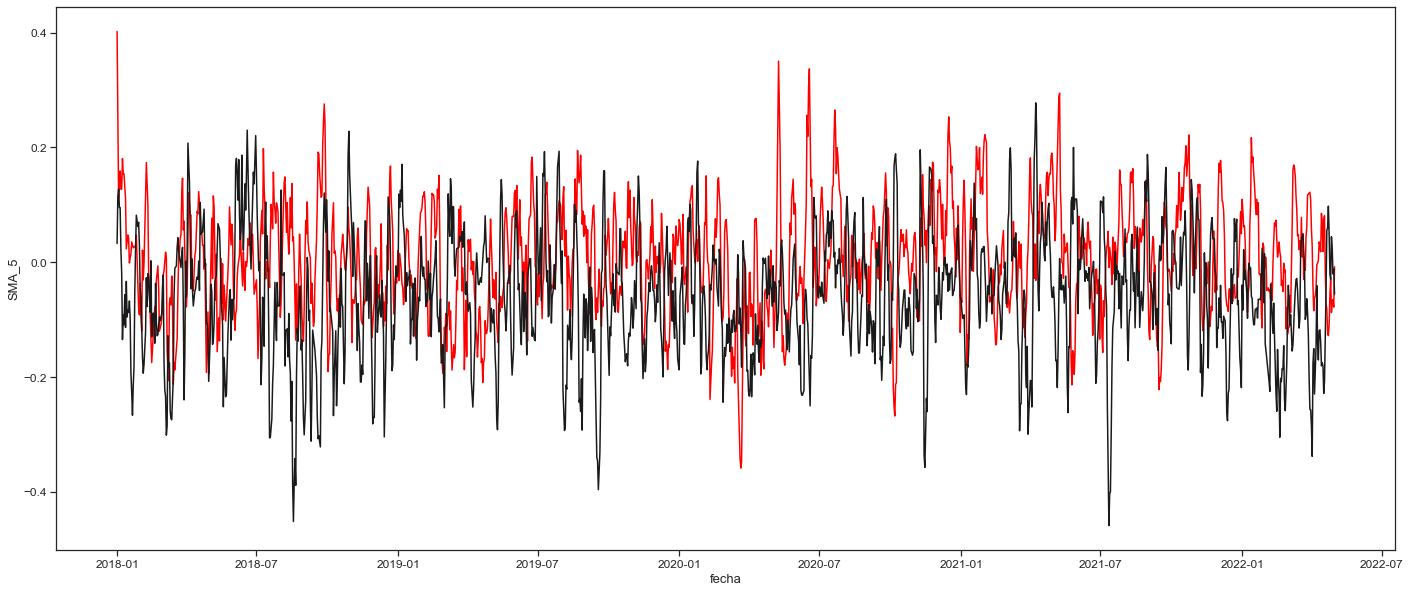

In [35]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=politica, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=exterior, x = 'fecha', y = 'SMA_5', color= 'k')

---
### Mercados  

In [50]:
mercados = df[df['categoria'] == 'Mercados']
mercados = mercados.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
mercados['SMA_2'] = mercados['compound'].rolling(window = 2, min_periods = 1).mean()
mercados['SMA_20'] = mercados['compound'].rolling(window = 20, min_periods = 1).mean()

<AxesSubplot:xlabel='fecha', ylabel='SMA_2'>

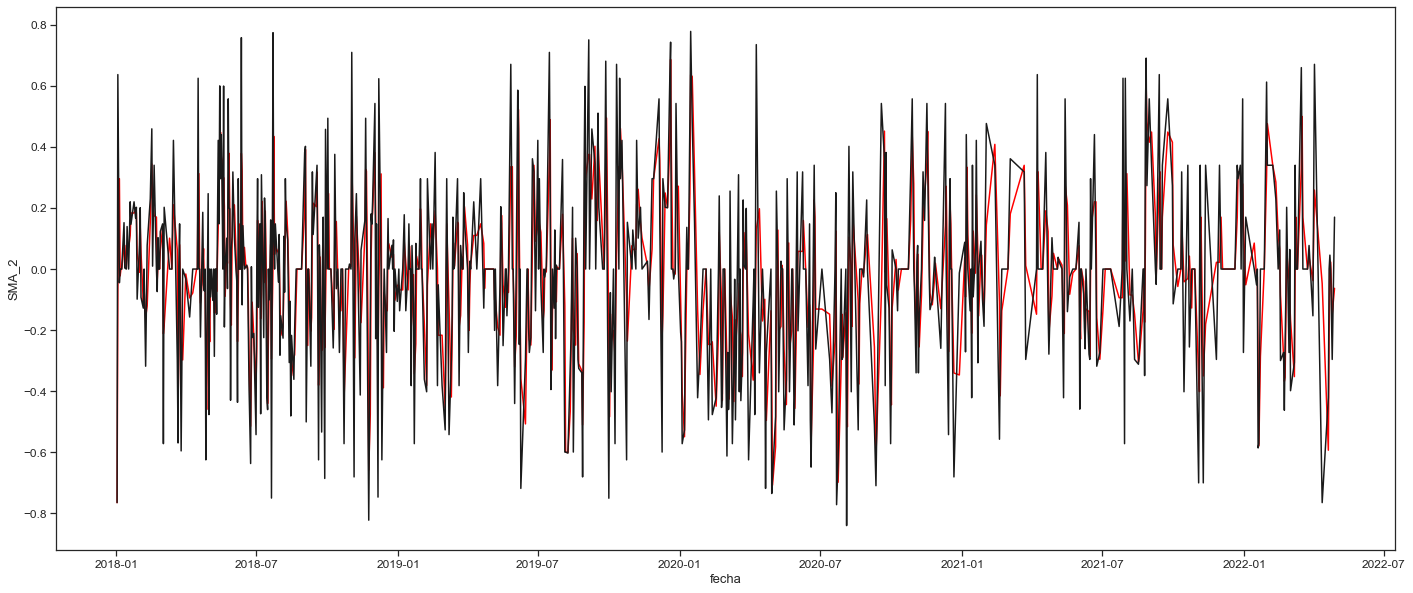

In [51]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=mercados, x = 'fecha', y = 'SMA_2', color= 'red')
sns.lineplot(data=mercados, x = 'fecha', y = 'compound', color= 'k')